# Part 2: Dimensionality Reduction

In [15]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

## Dimensionality Reduction on Car Dataset

In [16]:
# Car Dataset Setup

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

target.value_counts()

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
    'pca_recon': [],
    'svd_recon': [],
    'rp_recon': [],
    'ica_recon': [],
}


4    1210
3     384
2      69
1      65
Name: class, dtype: int64
1296
1296
432
432


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


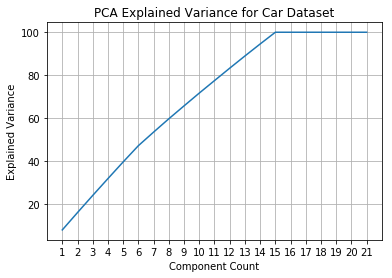

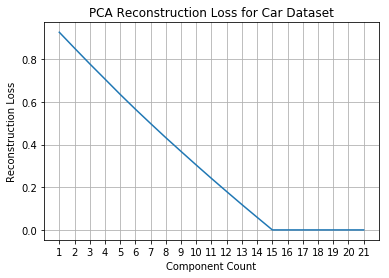

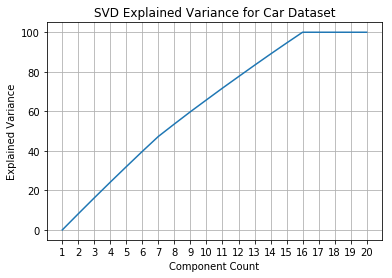

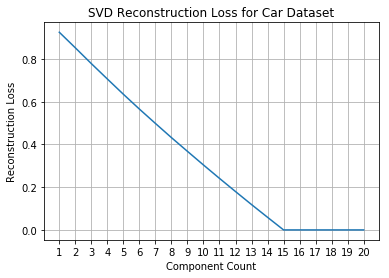

In [17]:
# PCA
X_train = X_train
car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(X_train)

plt.figure()
plt.plot(np.arange(1,22), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,22))
plt.show()


for i in np.arange(1,22):
    car_pca = PCA(n_components=i)
    car_reduced_X_train  = car_pca.fit_transform(X_train_std)
    projected_X_train = car_pca.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['pca_recon'].append(loss)


    
    
plt.figure()
plt.plot(np.arange(1,22), storage['pca_recon'])
plt.title('PCA Reconstruction Loss for Car Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,22))
plt.show()


# SVD

car_svd = TruncatedSVD(n_components=20)
car_reduced_X_train = car_svd.fit_transform(X_train)

plt.figure()
plt.plot(np.arange(1,21), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,21))
plt.show()

for i in np.arange(1,21):
    car_svd = TruncatedSVD(n_components=i)
    car_reduced_X_train  = car_svd.fit_transform(X_train_std)
    projected_X_train = car_svd.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['svd_recon'].append(loss)


    
    
plt.figure()
plt.plot(np.arange(1,21), storage['svd_recon'])
plt.title('SVD Reconstruction Loss for Car Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,21))
plt.show()


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 21
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

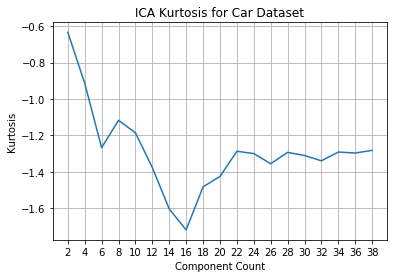

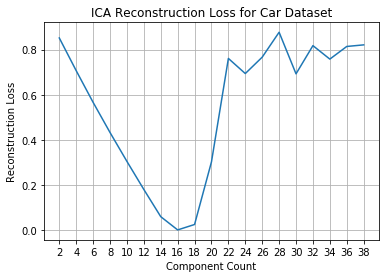

In [18]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(X_train_std)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))
    projected_X_train = car_ica.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['ica_recon'].append(loss)

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()
     
plt.figure()
plt.plot(component_range, storage['ica_recon'])
plt.title('ICA Reconstruction Loss for Car Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 22).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 24).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 26).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

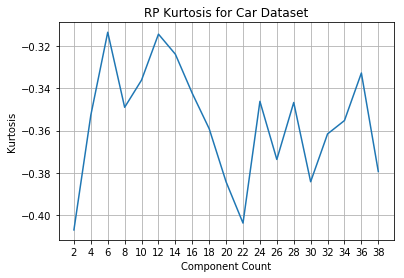

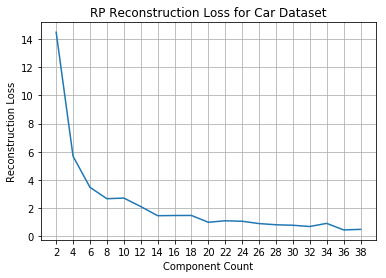

In [19]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i)
    car_reduced_X_train  = car_rp.fit_transform(X_train_std)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))
    projection_matrix = car_rp.components_
    projected_X_train = np.dot(car_reduced_X_train, projection_matrix)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['rp_recon'].append(loss)
    

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

plt.figure()
plt.plot(component_range, storage['rp_recon'])
plt.title('RP Reconstruction Loss for Car Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

## Dimensionality Reduction on Wine

In [20]:
# Car Dataset Setup

wine_df = pd.read_csv("data/winequalityN.csv")
wine_df.head()

cleanup_wines = {"type":     {"white": 0, "red": 1}
                }
wine_df.replace(cleanup_wines,inplace = True)
wine_df = wine_df.dropna()

target = wine_df['quality']
target[target < 6] = 0
target[target >= 6] = 1
print(len(target))
print(target.value_counts())
wine_df.drop(['quality'],axis = 1,inplace = True)
wine_df.head()

X_train,X_test,Y_train,Y_test = train_test_split(wine_df, target, random_state=42)

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
    'pca_recon': [],
    'svd_recon': [],
    'rp_recon': [],
    'ica_recon': [],
}



6463
1    4091
0    2372
Name: quality, dtype: int64


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standard

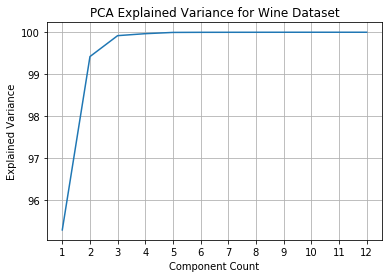

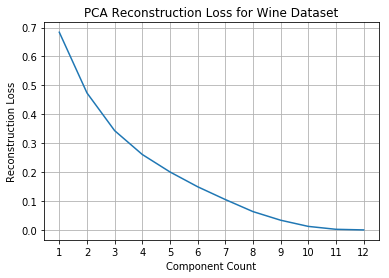

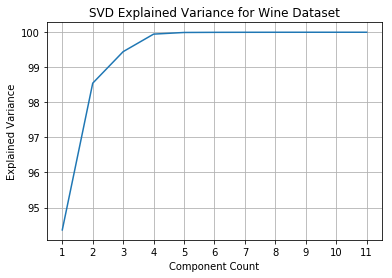

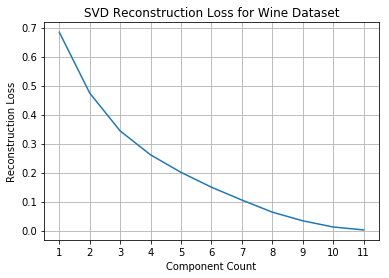

In [21]:
# PCA

car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(X_train)

plt.figure()
plt.plot(np.arange(1,13), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Wine Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,13))
plt.show()

for i in np.arange(1,13):
    car_pca = PCA(n_components=i)
    car_reduced_X_train  = car_pca.fit_transform(X_train_std)
    projected_X_train = car_pca.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['pca_recon'].append(loss)


    
    
plt.figure()
plt.plot(np.arange(1,13), storage['pca_recon'])
plt.title('PCA Reconstruction Loss for Wine Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,13))
plt.show()


# SVD

car_svd = TruncatedSVD(n_components=11)
car_reduced_X_train = car_svd.fit_transform(X_train)

plt.figure()
plt.plot(np.arange(1,12), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Wine Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,12))
plt.show()

for i in np.arange(1,12):
    car_svd = TruncatedSVD(n_components=i)
    car_reduced_X_train  = car_svd.fit_transform(X_train_std)
    projected_X_train = car_svd.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['svd_recon'].append(loss)


plt.figure()
plt.plot(np.arange(1,12), storage['svd_recon'])
plt.title('SVD Reconstruction Loss for Wine Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,12))
plt.show()


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 12
  warnings.warn('n_components is too large: it will be set

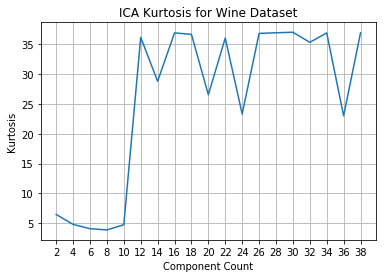

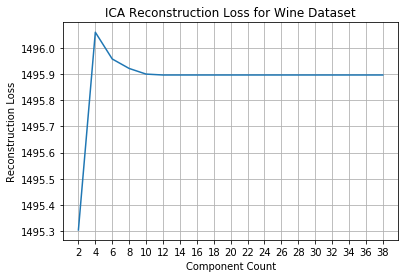

In [22]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(X_train)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))
    projected_X_train = car_ica.inverse_transform(car_reduced_X_train)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['ica_recon'].append(loss)

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Wine Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()
     
plt.figure()
plt.plot(component_range, storage['ica_recon'])
plt.title('ICA Reconstruction Loss for Wine Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 14).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 16).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (12 < 18).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

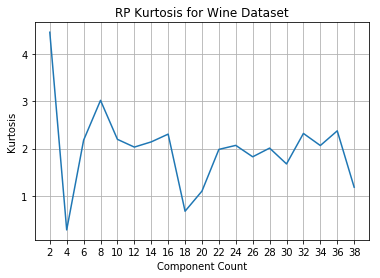

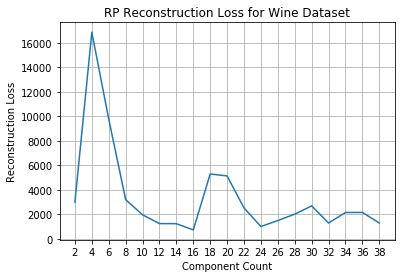

In [23]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i)
    car_reduced_X_train  = car_rp.fit_transform(X_train)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))
    projection_matrix = car_rp.components_
    projected_X_train = np.dot(car_reduced_X_train, projection_matrix)
    loss = ((X_train_std - projected_X_train) ** 2).mean()
    storage['rp_recon'].append(loss)
    

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Wine Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

plt.figure()
plt.plot(component_range, storage['rp_recon'])
plt.title('RP Reconstruction Loss for Wine Dataset')
plt.ylabel('Reconstruction Loss')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()